In [0]:
import pandas as pd
import numpy as np

In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/Oolala/Oolala.csv"

!cp drive/My Drive/Colab Notebooks/Oolala Cabs Case Study.csv

In [0]:
import io
df = pd.read_csv(path)

In [283]:
df.head()

,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by
0,4824156,4,305169,10.0,1/2/19 13:10,1/2/19 13:32,1/2/19 14:04,Andheri West,Juhu,1.70,NaN
1,4826642,4,498734,10.0,1/2/19 16:45,1/2/19 17:01,1/2/19 21:08,Andheri East,Kalyan,47.03,NaN
2,4830467,4,125080,10.0,1/3/19 11:25,1/3/19 11:30,1/3/19 13:02,Andheri West,Bandra West,7.93,NaN
3,4832599,4,107008,10.0,1/3/19 14:50,1/3/19 14:37,1/3/19 15:09,Juhu,Jogeshwari West,6.35,NaN
4,4833444,4,278997,10.0,1/3/19 15:36,1/3/19 15:42,1/3/19 17:29,Jogeshwari West,Saki Naka,8.48,NaN


In [284]:
df.columns

Index(['order_id', 'status', 'customer_id', 'driver_id', 'pickup_time',
       'start_time', 'drop_time', 'pickup_loc', 'drop_loc', 'travel_distance',
       'cancelled_by'],
      dtype='object')

# Checking the data type of column headers 

In [285]:
print(all(isinstance(column, str) for column in df.columns))
print(df.shape)

True
(20205, 11)


# Removing Duplicate values

In [286]:
df=df.drop_duplicates()
df.shape

(20168, 11)

# Dropping Unnecessary Columns

In [287]:
df.drop(['order_id','customer_id'],axis=1, inplace=True) # To drop unnecesary columns from data frame
df.head()


,status,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by
0,4,10.0,1/2/19 13:10,1/2/19 13:32,1/2/19 14:04,Andheri West,Juhu,1.70,NaN
1,4,10.0,1/2/19 16:45,1/2/19 17:01,1/2/19 21:08,Andheri East,Kalyan,47.03,NaN
2,4,10.0,1/3/19 11:25,1/3/19 11:30,1/3/19 13:02,Andheri West,Bandra West,7.93,NaN
3,4,10.0,1/3/19 14:50,1/3/19 14:37,1/3/19 15:09,Juhu,Jogeshwari West,6.35,NaN
4,4,10.0,1/3/19 15:36,1/3/19 15:42,1/3/19 17:29,Jogeshwari West,Saki Naka,8.48,NaN


# Cleaning of Data - Removing NULL and Invalid Entries

In [288]:

df=df[(~((df['start_time'].notnull()) & (df['drop_time'].notnull()) & (df['status'] == 5))) & (~((df['status']==5) & (df['cancelled_by'].isnull()))) & (~((df['status']==4) & (df['cancelled_by'].notnull()))) & (~((df['status']==5) & (df['start_time'].notnull())&(df['drop_time'].isnull()) )) ]
df.shape

(20032, 9)

# **Importing Visualization Libraries**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Total No. Of Rides Completed Vs cancelled

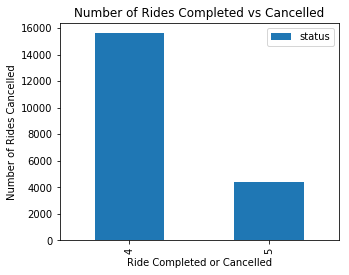

In [290]:
c= df['status'].value_counts()
df1= pd.DataFrame(data = c)

df1.plot(kind='bar', figsize=(5, 4))

plt.xlabel('Ride Completed or Cancelled') # add to x-label to the plot
plt.ylabel('Number of Rides Cancelled') # add y-label to the plot
plt.title('Number of Rides Completed vs Cancelled') # add title to the plot

plt.show()

No handles with labels found to put in legend.


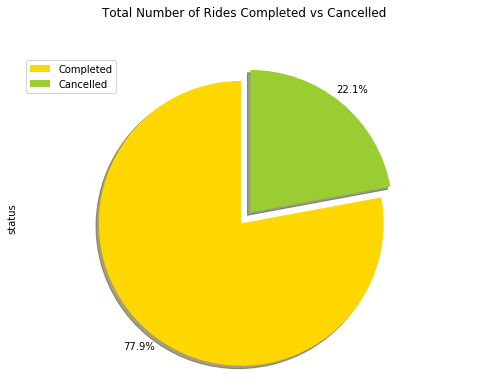

In [291]:
colors_list = ['gold', 'yellowgreen']
explode_list = [0.1, 0] 

df1.plot(kind='pie',figsize=(8, 6),autopct='%1.1f%%', startangle=90,shadow=True,labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list, subplots= True)


plt.title('Total Number of Rides Completed vs Cancelled', y=1.1) 

plt.axis('equal') 

# add legend
plt.legend(labels=['Completed','Cancelled'], loc='upper left') 

plt.show()

# No of Rides Completed vs Cancelled for Airport

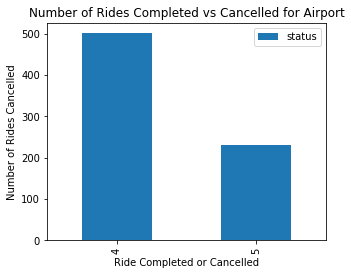

In [292]:
df2= df[df['drop_loc']=='Airport']
d= df2['status'].value_counts()

df2= pd.DataFrame(data=d)

df2.plot(kind='bar', figsize=(5, 4))

plt.xlabel('Ride Completed or Cancelled') # add to x-label to the plot
plt.ylabel('Number of Rides Cancelled') # add y-label to the plot
plt.title('Number of Rides Completed vs Cancelled for Airport') # add title to the plot

plt.show()

No handles with labels found to put in legend.


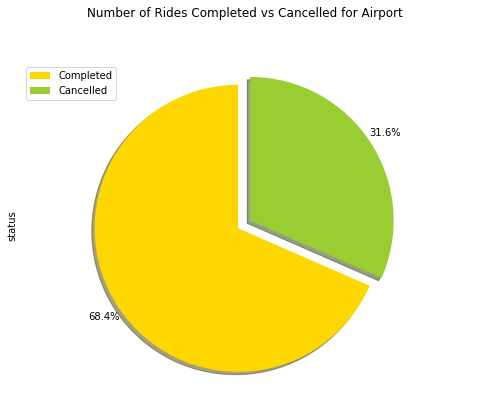

In [293]:
colors_list = ['gold', 'yellowgreen']
explode_list = [0.1, 0] 

df2.plot(kind='pie',figsize=(8, 6),autopct='%1.1f%%', startangle=90,shadow=True,labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list, subplots= True)


plt.title('Number of Rides Completed vs Cancelled for Airport', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=['Completed','Cancelled'], loc='upper left') 

plt.show()

In [294]:
df_can_airport= df[(df['drop_loc']=='Airport') & (df['status'] == 5)] # Data Frame to store cancelled rides for airport

df_can_airport.shape

(231, 9)

# No. of Rides Cancelled for Each Drop Location

In [295]:
df_total_cancelled=df[df['status']==5]
print(df_total_cancelled.shape)
a=df_total_cancelled['drop_loc'].value_counts()[:30] # To store top 25 destinations where no. of rides cancelled is maximum
df_droploc=pd.DataFrame(data=a)  # Data Frame to store no of rides cancelled for each destination
df_droploc.head(10)

(4424, 9)


,drop_loc
Churchgate,233
Powai,233
Airport,231
Byculla,158
Kurla,157
Vikhroli,123
Bandra West,120
Bandra East,117
Lower Parel,113
Ghatkopar,106


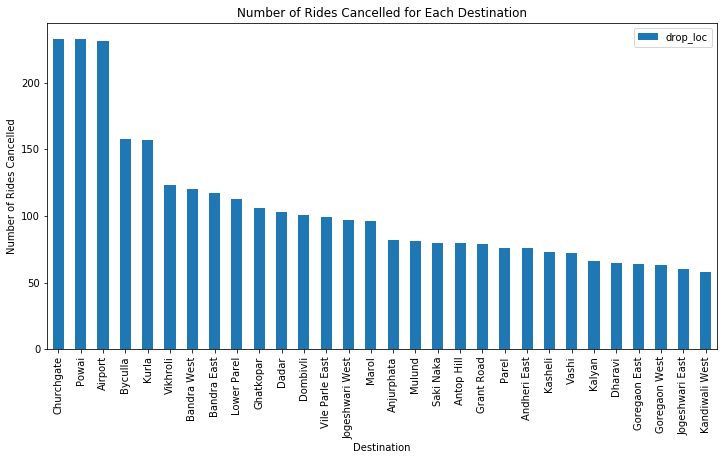

In [296]:
df_droploc.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Destination') # add to x-label to the plot
plt.ylabel('Number of Rides Cancelled') # add y-label to the plot
plt.title('Number of Rides Cancelled for Each Destination') # add title to the plot

plt.show()

# No. of Rides Cancelled for Airport

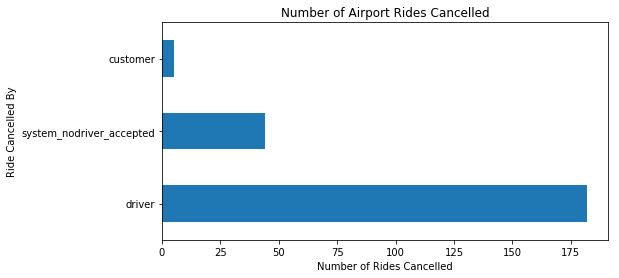

In [297]:
df_cancelled_airport=df_can_airport['cancelled_by'].value_counts()  #Data Frame to store number of rides cancelled 
                                                                       # for airport by everyone

df_cancelled_airport.plot(kind='barh', figsize=(8, 4))

plt.xlabel('Number of Rides Cancelled') # add to x-label to the plot
plt.ylabel('Ride Cancelled By') # add y-label to the plot 
plt.title('Number of Airport Rides Cancelled') # add title to the plot

plt.show()

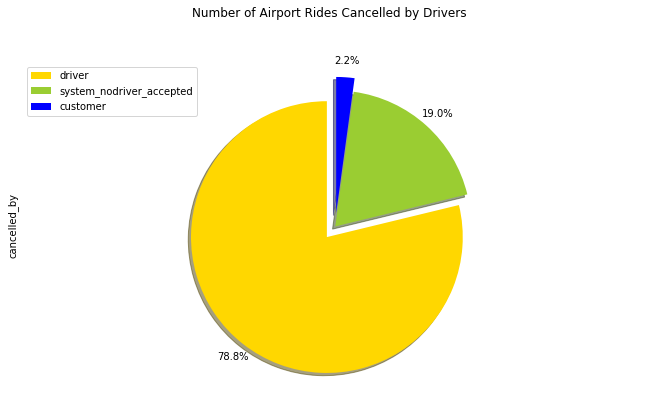

In [298]:
colors_list = ['gold', 'yellowgreen','blue']
explode_list = [0.1, 0,0.1] 

df_cancelled_airport.plot(kind='pie',figsize=(11, 6),autopct='%1.1f%%', startangle=90,shadow=True,labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list, subplots= True)


plt.title('Number of Airport Rides Cancelled by Drivers', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_cancelled_airport.index, loc='upper left') 

plt.show()

# No. of Rides Cancelled for every drop location

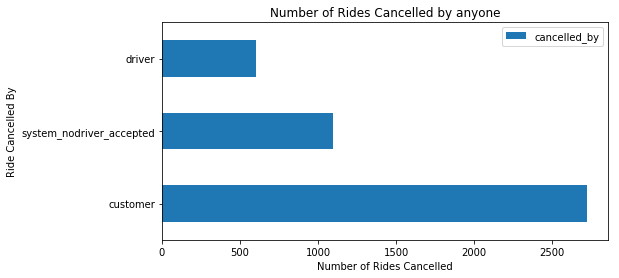

In [299]:
b= df_total_cancelled['cancelled_by'].value_counts()
df_can_all=pd.DataFrame(data=b)
df_can_all.head()

df_can_all.plot(kind='barh', figsize=(8, 4))
plt.xlabel('Number of Rides Cancelled') # add to x-label to the plot
plt.ylabel('Ride Cancelled By') # add y-label to the plot 
plt.title('Number of Rides Cancelled by anyone') # add title to the plot

plt.show()

No handles with labels found to put in legend.


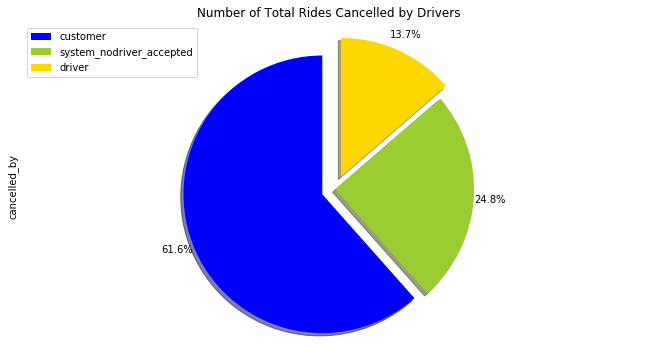

In [300]:
colors_list = ['blue', 'yellowgreen','gold']
explode_list = [0.1, 0,0.1] # ratio for each cancel with which to offset each wedge.

df_can_all.plot(kind='pie',figsize=(11, 6),autopct='%1.1f%%', startangle=90,shadow=True,labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list, subplots= True)


plt.title('Number of Total Rides Cancelled by Drivers', y=1.0) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_can_all.index, loc='upper left') 

plt.show()

In [301]:
df.head()

,status,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by
0,4,10.0,1/2/19 13:10,1/2/19 13:32,1/2/19 14:04,Andheri West,Juhu,1.70,NaN
1,4,10.0,1/2/19 16:45,1/2/19 17:01,1/2/19 21:08,Andheri East,Kalyan,47.03,NaN
2,4,10.0,1/3/19 11:25,1/3/19 11:30,1/3/19 13:02,Andheri West,Bandra West,7.93,NaN
3,4,10.0,1/3/19 14:50,1/3/19 14:37,1/3/19 15:09,Juhu,Jogeshwari West,6.35,NaN
4,4,10.0,1/3/19 15:36,1/3/19 15:42,1/3/19 17:29,Jogeshwari West,Saki Naka,8.48,NaN


# No. of Rides Cancelled By Drivers/ Total No. of Rides Booked for that destination

In [0]:
df_per_cancelledby_driver=df[(df['status']==5) &(df['cancelled_by']=='driver')]

In [303]:
df_per_cancelledby_driver.shape

(604, 9)

In [304]:
df_per_cancelledby_driver=df_per_cancelledby_driver['drop_loc']

print(df_per_cancelledby_driver.head())

12           Powai
37         Airport
50         Airport
84         Kharodi
175    Bandra West
Name: drop_loc, dtype: object


In [305]:
df_driver_cancelled=pd.DataFrame(data=df_per_cancelledby_driver.value_counts())
df_driver_cancelled = df_driver_cancelled.reset_index()
df_driver_cancelled.columns = ['drop_loc', 'counts']
df_driver_cancelled.head()

,drop_loc,counts
0,Airport,182
1,Powai,30
2,Churchgate,21
3,Byculla,19
4,Kurla,18


In [306]:
res1 = df_driver_cancelled.set_index('drop_loc') / df_new.set_index('drop_loc')
res1.sort_values(by='counts',ascending=False)
res1.head()

,counts
drop_loc,
Aarey,0.033816
Agra Road,0.028169
Airoli,0.009615
Airport,0.248634
Andheri East,0.019417


In [0]:
res1.dropna(subset=['counts'], axis=0, inplace=True)

In [308]:
res1.shape

(66, 1)

In [0]:
res1=res1.sort_values(by='counts',ascending=True)

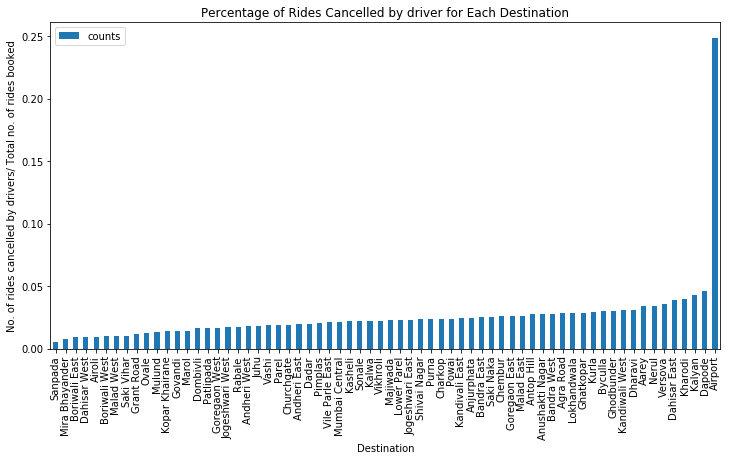

In [310]:
res1.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Destination') # add to x-label to the plot
plt.ylabel('No. of rides cancelled by drivers/ Total no. of rides booked') # add y-label to the plot
plt.title('Percentage of Rides Cancelled by driver for Each Destination') # add title to the plot

plt.show()

# Hypothesis testing confirmed- Drivers cancel the airport rides far more than cancelling any other drop location ride

# Converting each column to proper Data Type

In [311]:
df.dtypes

status               int64
driver_id          float64
pickup_time         object
start_time          object
drop_time           object
pickup_loc          object
drop_loc            object
travel_distance    float64
cancelled_by        object
dtype: object

In [0]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['drop_time'] = pd.to_datetime(df['drop_time'])
df['pickup_time'] = pd.to_datetime(df['pickup_time'])

In [313]:
df.dtypes

status                      int64
driver_id                 float64
pickup_time        datetime64[ns]
start_time         datetime64[ns]
drop_time          datetime64[ns]
pickup_loc                 object
drop_loc                   object
travel_distance           float64
cancelled_by               object
dtype: object

# Adding columns of Time Taken in Start-Pickup and Start-Drop

In [0]:
df['drop_start'] = (df['drop_time'] - df['start_time']).apply(lambda x: x/np.timedelta64(1,'m'))

In [0]:
df['start_pickup']= (df['start_time'] - df['pickup_time']).apply(lambda x: x/np.timedelta64(1,'m'))

In [316]:
df.head()

,status,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,drop_start,start_pickup
0,4,10.0,2019-01-02 13:10:00,2019-01-02 13:32:00,2019-01-02 14:04:00,Andheri West,Juhu,1.70,NaN,32.0,22.0
1,4,10.0,2019-01-02 16:45:00,2019-01-02 17:01:00,2019-01-02 21:08:00,Andheri East,Kalyan,47.03,NaN,247.0,16.0
2,4,10.0,2019-01-03 11:25:00,2019-01-03 11:30:00,2019-01-03 13:02:00,Andheri West,Bandra West,7.93,NaN,92.0,5.0
3,4,10.0,2019-01-03 14:50:00,2019-01-03 14:37:00,2019-01-03 15:09:00,Juhu,Jogeshwari West,6.35,NaN,32.0,-13.0
4,4,10.0,2019-01-03 15:36:00,2019-01-03 15:42:00,2019-01-03 17:29:00,Jogeshwari West,Saki Naka,8.48,NaN,107.0,6.0


Taking those values where Timestap are given correctly and where ride has been not cancelled

In [317]:
df.dtypes

status                      int64
driver_id                 float64
pickup_time        datetime64[ns]
start_time         datetime64[ns]
drop_time          datetime64[ns]
pickup_loc                 object
drop_loc                   object
travel_distance           float64
cancelled_by               object
drop_start                float64
start_pickup              float64
dtype: object

In [0]:
df_td=df[(df['start_pickup']>=0)]

In [319]:
df_td.head(10)

,status,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,drop_start,start_pickup
0,4,10.0,2019-01-02 13:10:00,2019-01-02 13:32:00,2019-01-02 14:04:00,Andheri West,Juhu,1.70,NaN,32.0,22.0
1,4,10.0,2019-01-02 16:45:00,2019-01-02 17:01:00,2019-01-02 21:08:00,Andheri East,Kalyan,47.03,NaN,247.0,16.0
2,4,10.0,2019-01-03 11:25:00,2019-01-03 11:30:00,2019-01-03 13:02:00,Andheri West,Bandra West,7.93,NaN,92.0,5.0
4,4,10.0,2019-01-03 15:36:00,2019-01-03 15:42:00,2019-01-03 17:29:00,Jogeshwari West,Saki Naka,8.48,NaN,107.0,6.0
5,4,10.0,2019-01-04 15:14:00,2019-01-04 15:23:00,2019-01-04 17:21:00,Andheri West,Lower Parel,17.52,NaN,118.0,9.0
7,4,10.0,2019-01-05 11:41:00,2019-01-05 11:42:00,2019-01-05 12:17:00,Juhu,Saki Naka,6.52,NaN,35.0,1.0
8,4,10.0,2019-01-05 16:33:00,2019-01-05 16:46:00,2019-01-05 18:38:00,Jogeshwari West,Dadar,19.96,NaN,112.0,13.0
9,4,10.0,2019-01-07 12:57:00,2019-01-07 13:21:00,2019-01-07 14:04:00,Andheri West,Malad West,8.39,NaN,43.0,24.0
11,4,10.0,2019-01-07 18:38:00,2019-01-07 19:13:00,2019-01-07 20:35:00,Aarey,Kandivali East,8.20,NaN,82.0,35.0
14,4,10.0,2019-01-09 09:00:00,2019-01-09 09:25:00,2019-01-09 10:10:00,Andheri East,Aarey,3.78,NaN,45.0,25.0


# Checking Mean Drop-Start Time for each location

In [320]:
df_temp1= df_td[['drop_loc','drop_start']]
df_temp1=df_temp1.groupby('drop_loc', axis=0).mean()
df_temp1.sort_values(by='drop_start',inplace=True,ascending=False)
df_temp1 = df_temp1.reset_index()
df_temp1.columns = ['Drop Location', 'Mean Time(Mins)']
df_temp1.head()
df_temp1.head(15)

,Drop Location,Mean Time(Mins)
0,Ghodbunder,214.733333
1,Padgha,169.325000
2,Kalyan,164.425373
3,Airport,156.303769
4,Uttan,148.500000
5,Sonale,145.620690
6,Versova,145.133333
7,Mira Bhayander,144.157303
8,Anjurphata,143.972222
9,Pogaon,140.333333


# Checking Number of Pickup Rides from Each Location

In [321]:
df['pickup_loc'].value_counts()[0:15]

Powai              1332
Byculla             781
Ghatkopar           719
Churchgate          685
Jogeshwari West     642
Airport             614
Kurla               605
Saki Naka           589
Kasheli             577
Bandra West         512
Bandra East         506
Andheri East        481
Mulund              444
Parel               439
Lower Parel         431
Name: pickup_loc, dtype: int64

# Finding Average Distance travelled for each drop location

In [0]:
df_temp2=df_td[['drop_loc','travel_distance']]

In [0]:
df_temp2=df_temp2.groupby('drop_loc', axis=0).mean()

In [324]:
df_temp2.head()

,travel_distance
drop_loc,
Aarey,13.037929
Agra Road,13.904400
Airoli,15.956933
Airport,34.071663
Andheri East,9.871897


In [325]:
df_temp2.sort_values(by='travel_distance',inplace=True, ascending=False)
df_temp2.head(10)


,travel_distance
drop_loc,
Padgha,36.548250
Uttan,34.167500
Airport,34.071663
Kalyan,30.571567
Sonale,26.181207
Dombivli,25.798396
Pogaon,25.034167
Mira Bhayander,23.764607
Kasheli,23.204500


In [326]:

df_temp2 = df_temp2.reset_index()
df_temp2.columns = ['Drop Location', 'Mean Distance']


df_temp2.head()

,Drop Location,Mean Distance
0,Padgha,36.548250
1,Uttan,34.167500
2,Airport,34.071663
3,Kalyan,30.571567
4,Sonale,26.181207


In [327]:
df_temp3=df_temp2[0:10]
df_temp3

,Drop Location,Mean Distance
0,Padgha,36.548250
1,Uttan,34.167500
2,Airport,34.071663
3,Kalyan,30.571567
4,Sonale,26.181207
5,Dombivli,25.798396
6,Pogaon,25.034167
7,Mira Bhayander,23.764607
8,Kasheli,23.204500
9,Anjurphata,22.880370


# Checking if Airport Rides are taking more times as compared to other rides of approx same distance

In [328]:
dfn=pd.merge(df_temp3, df_temp1, on="Drop Location")
dfn.head(10)

,Drop Location,Mean Distance,Mean Time(Mins)
0,Padgha,36.548250,169.325000
1,Uttan,34.167500,148.500000
2,Airport,34.071663,156.303769
3,Kalyan,30.571567,164.425373
4,Sonale,26.181207,145.620690
5,Dombivli,25.798396,129.411765
6,Pogaon,25.034167,140.333333
7,Mira Bhayander,23.764607,144.157303
8,Kasheli,23.204500,136.685714
9,Anjurphata,22.880370,143.972222


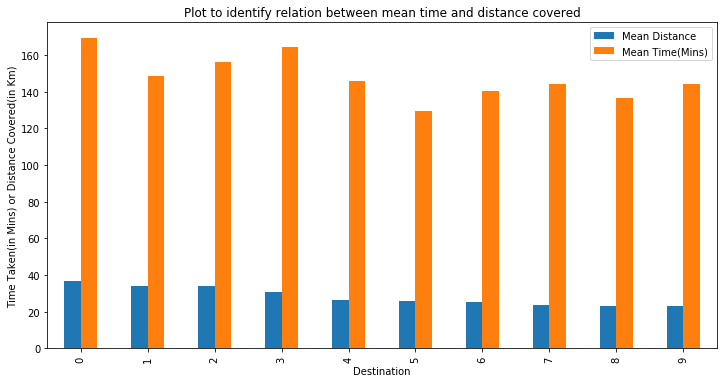

In [329]:

dfn.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Destination') # add to x-label to the plot
plt.ylabel('Time Taken(in Mins) or Distance Covered(in Km)') # add y-label to the plot
plt.title('Plot to identify relation between mean time and distance covered') # add title to the plot

plt.show()

In [0]:
dfn['speed'] = (dfn['Mean Distance']*60)/dfn['Mean Time(Mins)']

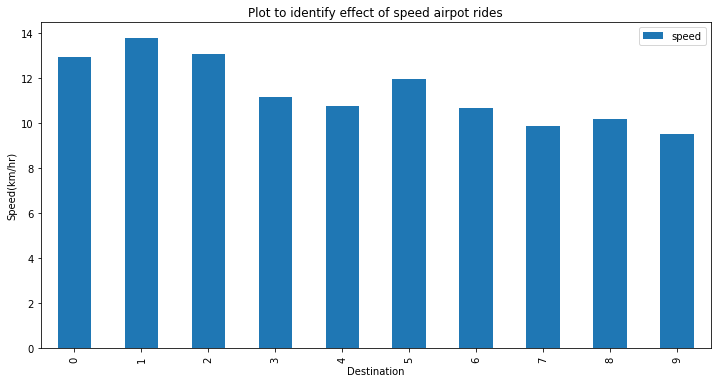

In [331]:
dfn[['speed' , 'Drop Location']].plot(kind='bar', figsize=(12, 6))

plt.xlabel('Destination') # add to x-label to the plot
plt.ylabel('Speed(km/hr)') # add y-label to the plot
plt.title('Plot to identify effect of speed airpot rides') # add title to the plot

plt.show()

# Checking whether start pickup time is more for airport rides

In [332]:
df_temp4= df_td[['drop_loc','start_pickup']]
df_temp4=df_temp4.groupby('drop_loc', axis=0).mean()
df_temp4.sort_values(by='start_pickup',inplace=True,ascending=False)
df_temp4 = df_temp4.reset_index()
df_temp4.columns = ['Drop Location', 'Mean Start-Pickup Time(Mins)']
df_temp4.head()
df_temp4.head(10)

,Drop Location,Mean Start-Pickup Time(Mins)
0,Mahul,17.296296
1,Anjurphata,16.694444
2,Rabale,15.074534
3,Lower Parel,14.566502
4,Dombivli,14.272727
5,Padgha,14.150000
6,Uttan,14.000000
7,Airport,13.977827
8,Dapode,13.526316
9,Govandi,13.517007


# Probablity of ride being completed for all locations based on available data

Finding total no of rides booked for each location

In [333]:
df_new=pd.DataFrame(data=df['drop_loc'].value_counts())
df_new
df_new = df_new.reset_index()
df_new.columns = ['drop_loc', 'counts']
df_new.head()

,drop_loc,counts
0,Powai,1259
1,Churchgate,1097
2,Airport,732
3,Byculla,637
4,Bandra East,628


Finding total no of completed rides for each location

In [334]:
df_n1=pd.DataFrame(data=df_td['drop_loc'].value_counts())
df_n1 = df_n1.reset_index()
df_n1.columns = ['drop_loc', 'counts']
df_n1.head()

,drop_loc,counts
0,Powai,878
1,Churchgate,738
2,Airport,451
3,Bandra East,430
4,Byculla,429


Probablity of successful ride from previous data

In [335]:
res = df_n1.set_index('drop_loc') / df_new.set_index('drop_loc')
res.sort_values(by='counts',inplace=True,ascending=False)
res.head(10)

,counts
drop_loc,
Versova,0.803571
Mahul,0.771429
Juhu,0.762332
Andheri West,0.750000
Ghodbunder,0.750000
Mulund,0.746204
Kharegaon,0.741935
Saki Naka,0.734252
Grant Road,0.733796


# Checking whether airport rides are usually of late night or early morning

In [336]:
df.head()

,status,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,drop_start,start_pickup
0,4,10.0,2019-01-02 13:10:00,2019-01-02 13:32:00,2019-01-02 14:04:00,Andheri West,Juhu,1.70,NaN,32.0,22.0
1,4,10.0,2019-01-02 16:45:00,2019-01-02 17:01:00,2019-01-02 21:08:00,Andheri East,Kalyan,47.03,NaN,247.0,16.0
2,4,10.0,2019-01-03 11:25:00,2019-01-03 11:30:00,2019-01-03 13:02:00,Andheri West,Bandra West,7.93,NaN,92.0,5.0
3,4,10.0,2019-01-03 14:50:00,2019-01-03 14:37:00,2019-01-03 15:09:00,Juhu,Jogeshwari West,6.35,NaN,32.0,-13.0
4,4,10.0,2019-01-03 15:36:00,2019-01-03 15:42:00,2019-01-03 17:29:00,Jogeshwari West,Saki Naka,8.48,NaN,107.0,6.0


In [0]:
df_t1=df[['status','pickup_time','drop_loc']]

In [338]:
df_t1.head()

,status,pickup_time,drop_loc
0,4,2019-01-02 13:10:00,Juhu
1,4,2019-01-02 16:45:00,Kalyan
2,4,2019-01-03 11:25:00,Bandra West
3,4,2019-01-03 14:50:00,Jogeshwari West
4,4,2019-01-03 15:36:00,Saki Naka


In [339]:
df_t1['time'] = df_t1['pickup_time'].dt.time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [340]:
df_t1.head()

,status,pickup_time,drop_loc,time
0,4,2019-01-02 13:10:00,Juhu,13:10:00
1,4,2019-01-02 16:45:00,Kalyan,16:45:00
2,4,2019-01-03 11:25:00,Bandra West,11:25:00
3,4,2019-01-03 14:50:00,Jogeshwari West,14:50:00
4,4,2019-01-03 15:36:00,Saki Naka,15:36:00


In [341]:
df_t1.dtypes

status                  int64
pickup_time    datetime64[ns]
drop_loc               object
time                   object
dtype: object

In [342]:
df_t1=df_t1[(df_t1['drop_loc']=='Airport')]
df_t1.head()

,status,pickup_time,drop_loc,time
37,5,2019-01-09 20:38:00,Airport,20:38:00
50,5,2019-01-11 11:00:00,Airport,11:00:00
140,4,2019-01-02 16:34:00,Airport,16:34:00
143,4,2019-01-07 11:14:00,Airport,11:14:00
184,4,2019-01-05 13:01:00,Airport,13:01:00


In [343]:
df_airportcancelcount=df_t1['status'].value_counts()
df_airportcancelcount = df_airportcancelcount.reset_index()
df_airportcancelcount.columns = ['status', 'counts']
df_airportcancelcount

,status,counts
0,4,501
1,5,231


In [344]:
df_airport_oddtime=df_t1[(df_t1.pickup_time.dt.strftime('%H:%M:%S').between('22:00:00','23:59:00')) | (df_t1.pickup_time.dt.strftime('%H:%M:%S').between('00:00:00','06:00:00'))]
df_airport_oddtime.head()
df_airport_oddtime.shape

(30, 4)

In [345]:
df_t2=df_airport_oddtime['status'].value_counts()
df_t2 = df_t2.reset_index()
df_t2.columns = ['status', 'counts']
df_t2

,status,counts
0,5,20
1,4,10


In [346]:
dfn1=pd.merge(df_airportcancelcount, df_t2, on='status')
dfn1.columns=['Status','Total No.of Rides','Late night or early morning rides']
dfn1.head()

,Status,Total No.of Rides,Late night or early morning rides
0,4,501,10
1,5,231,20


# Verifying whether driver gets return booking or not

In [347]:
df.head()

,status,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,drop_start,start_pickup
0,4,10.0,2019-01-02 13:10:00,2019-01-02 13:32:00,2019-01-02 14:04:00,Andheri West,Juhu,1.70,NaN,32.0,22.0
1,4,10.0,2019-01-02 16:45:00,2019-01-02 17:01:00,2019-01-02 21:08:00,Andheri East,Kalyan,47.03,NaN,247.0,16.0
2,4,10.0,2019-01-03 11:25:00,2019-01-03 11:30:00,2019-01-03 13:02:00,Andheri West,Bandra West,7.93,NaN,92.0,5.0
3,4,10.0,2019-01-03 14:50:00,2019-01-03 14:37:00,2019-01-03 15:09:00,Juhu,Jogeshwari West,6.35,NaN,32.0,-13.0
4,4,10.0,2019-01-03 15:36:00,2019-01-03 15:42:00,2019-01-03 17:29:00,Jogeshwari West,Saki Naka,8.48,NaN,107.0,6.0


In [364]:
df_fin = df.drop(['start_time','cancelled_by','drop_start','start_pickup'], axis=1)
df_fin.head()

,status,driver_id,pickup_time,drop_time,pickup_loc,drop_loc,travel_distance
0,4,10.0,2019-01-02 13:10:00,2019-01-02 14:04:00,Andheri West,Juhu,1.70
1,4,10.0,2019-01-02 16:45:00,2019-01-02 21:08:00,Andheri East,Kalyan,47.03
2,4,10.0,2019-01-03 11:25:00,2019-01-03 13:02:00,Andheri West,Bandra West,7.93
3,4,10.0,2019-01-03 14:50:00,2019-01-03 15:09:00,Juhu,Jogeshwari West,6.35
4,4,10.0,2019-01-03 15:36:00,2019-01-03 17:29:00,Jogeshwari West,Saki Naka,8.48


In [0]:
df_fin=df_fin[df_fin['status']==4]

In [366]:
df_fin.shape

(15608, 7)

In [367]:
df_fin=df_fin[(df['drop_loc']=='Airport') | (df['pickup_loc']=='Airport')]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [368]:
df_fin.shape

(807, 7)

In [370]:
df_fin.head()
df_fin=df_fin.drop(['status'], axis=1)
df_fin.sort_values(by='driver_id', inplace=True, ascending=True)
df_fin.head(10)

,driver_id,pickup_time,drop_time,pickup_loc,drop_loc,travel_distance
38,12.0,2019-01-11 13:36:00,2019-01-11 14:20:00,Airport,Marol,43.87
140,240.0,2019-01-02 16:34:00,2019-01-02 20:59:00,Purna,Airport,35.33
143,240.0,2019-01-07 11:14:00,2019-01-07 16:19:00,Aarey,Airport,40.59
184,275.0,2019-01-05 13:01:00,2019-01-05 17:31:00,Rabale,Airport,23.17
245,396.0,2019-01-02 18:51:00,2019-01-02 21:16:00,Nerul,Airport,9.11
358,619.0,2019-01-13 14:53:00,2019-01-13 17:30:00,Byculla,Airport,41.68
388,662.0,2019-01-10 12:22:00,2019-01-10 16:52:00,Airport,Sanpada,70.72
389,662.0,2019-01-10 18:38:00,2019-01-10 21:53:00,Majiwada,Airport,41.40
391,662.0,2019-01-12 18:20:00,2019-01-12 22:10:00,Airport,Byculla,59.93
394,774.0,2019-01-01 15:04:00,2019-01-01 16:21:00,Sanpada,Airport,11.54


In [0]:
df_fin=df_fin.reset_index()

In [372]:
df_fin.drop(['index'], axis=1, inplace= True)
df_fin.head()

,driver_id,pickup_time,drop_time,pickup_loc,drop_loc,travel_distance
0,12.0,2019-01-11 13:36:00,2019-01-11 14:20:00,Airport,Marol,43.87
1,240.0,2019-01-02 16:34:00,2019-01-02 20:59:00,Purna,Airport,35.33
2,240.0,2019-01-07 11:14:00,2019-01-07 16:19:00,Aarey,Airport,40.59
3,275.0,2019-01-05 13:01:00,2019-01-05 17:31:00,Rabale,Airport,23.17
4,396.0,2019-01-02 18:51:00,2019-01-02 21:16:00,Nerul,Airport,9.11


In [373]:
df_fin.dtypes

driver_id                 float64
pickup_time        datetime64[ns]
drop_time          datetime64[ns]
pickup_loc                 object
drop_loc                   object
travel_distance           float64
dtype: object

In [378]:
count=0
for i in df_fin.index:
  driver1=df_fin.iloc[i,0]
 
  if df_fin.iloc[i,4] == 'Airport':
   
    for j in range(i+1,len(df_fin)):
    
      if df_fin.iloc[j,3] == 'Airport':
        driver2= df_fin.iloc[j,0]
       
        a=pd.Timestamp(df_fin.iloc[i,2])
        b=pd.Timestamp(df_fin.iloc[j,1])
      
        if(driver1 == driver2 and ((b-a)/np.timedelta64(1,'m'))<60 and ((b-a)/np.timedelta64(1,'m')) >0 ):
          count=count+1
          
          
print("No. of Drivers who got return passenger within 60 minutes",count)

            
   



No. of Drivers who got return passenger within 60 minutes 21


# THANK YOU!!